In [2]:
import pandas as pd

import punch_party_utils

Let's view the first few columns of each dataframe to see what we are working with

In [3]:
gas_types = pd.read_csv('us_greenhouse_gas_emission_direct_emitter_gas_type.csv')
# RENAME ALL COLUMNS SO IT'S NOT SUCH AN EYESORE
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.ADDRESS1': 'Address Line 1'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.ADDRESS2': 'Address Line 2'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.CITY': 'City'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.CO2E_EMISSION': 'CO2 Emission'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.COUNTY': 'County'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.FACILITY_ID': 'Facility ID'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.GAS_CODE': 'Gas Code'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.GAS_NAME': 'Gas Name'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.LATITUDE': 'Latitude'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.LONGITUDE': 'Longitude'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.STATE': 'State'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.STATE_NAME': 'State Name'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.YEAR': 'Year'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.ZIP': 'Zip Code'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.FACILITY_NAME': 'Facility Name'})
gas_types = gas_types.rename(columns = {'V_GHG_EMITTER_GAS.COUNTY_FIPS': 'FIPS'})
# MAKE ADDRESSES ALL UPPERCASE, THEN DROP ROWS WITH NO ADDRESS
gas_types['Address Line 1'] = gas_types['Address Line 1'].str.upper()
gas_types = gas_types.dropna(subset =['Address Line 1'] )

gas_types.head()

,Address Line 1,Address Line 2,City,CO2 Emission,County,Facility ID,Gas Code,Gas Name,Latitude,Longitude,State,State Name,Year,Zip Code,Facility Name,FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0


The gas_type dataframe contains data about the location of emitter facilities and gas types emitted from each one. There are ~220,000 entries.

In [4]:
facilities = punch_party_utils.make_facilities_df(silent=False)

/tmp/ipykernel_38589/2059876933.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  facilities = pd.read_csv('us_greenhouse_gas_emissions_direct_emitter_facilities.csv')


,Address Line 1,Address Line 2,CEMS Used,City,County,FIPS,Facilities ID,Latitude,Longitude,NAICS Code,...,State Name,Year,Zip Code,Facility Name,Secondary NAICS Code,Additional NAICS Codes,Cogeneration Unit Emission Index(?),EPA Verified,Parent Company,Plant Code Indicator
0,301 COMMERCE DR. SUITE 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 SHELL E&P COURT,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
5,2237 HATCHER HILL RD,NaN,NaN,BACONTON,Mitchell,13205.0,1001409.0,31.386900,-84.081900,221112.0,...,GEORGIA,2011.0,31716.0,Baconton,NaN,NaN,N,NaN,SOWEGA ENERGY RESOURCES LLC. (65%); TEJAS POW...,NaN


The facilities dataframe contains data about each facility, namely address, location, and IDs (FIPS, NAICS). There are ~77,000 rows.

In [5]:
len(facilities)


71448

In [6]:
facilities.nunique()

Address Line 1                         8469
Address Line 2                            2
CEMS Used                                 0
City                                   4568
County                                 2866
FIPS                                   2021
Facilities ID                          9084
Latitude                               9658
Longitude                              9662
NAICS Code                              319
State                                    54
State Name                               54
Year                                     10
Zip Code                               5378
Facility Name                          9362
Secondary NAICS Code                    141
Additional NAICS Codes                  273
Cogeneration Unit Emission Index(?)       2
EPA Verified                              1
Parent Company                         8702
Plant Code Indicator                      2
dtype: int64

Total length of gas_types, when compared to number of facilites with no adress2 we see the whole column is empty - drop

In [7]:
len(gas_types)

203601

Number of NA vlaues in each column gas_types

In [14]:
gas_types.head(5)

,Address Line 1,Address Line 2,City,CO2 Emission,County,Facility ID,Gas Code,Gas Name,Latitude,Longitude,State,State Name,Year,Zip Code,Facility Name,FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0


In [18]:
avg_co2=gas_types.groupby("State")["CO2 Emission"].mean().reset_index()
avg_co2.head()

,State,CO2 Emission
0,AK,53541.627886
1,AL,224066.149908
2,AR,138426.488571
3,AZ,171035.347491
4,CA,87249.791937


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'DE'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'GA'),
  Text(11, 0, 'GU'),
  Text(12, 0, 'HI'),
  Text(13, 0, 'IA'),
  Text(14, 0, 'ID'),
  Text(15, 0, 'IL'),
  Text(16, 0, 'IN'),
  Text(17, 0, 'KS'),
  Text(18, 0, 'KY'),
  Text(19, 0, 'LA'),
  Text(20, 0, 'MA'),
  Text(21, 0, 'MD'),
  Text(22, 0, 'ME'),
  Text(23, 0, 'MI'),
  Text(24, 0, 'MN'),
  Text(25, 0, 'MO'),
  Text(26, 0, 'MS'),
  Text(27, 0, 'MT'),
  Text(28, 0, 'NC'),
  Text(29, 0, 'ND'),
  Text(30, 0, 'NE'),
  Text(31, 0, 'NH'),
  Text(32, 0, 'NJ'),
  

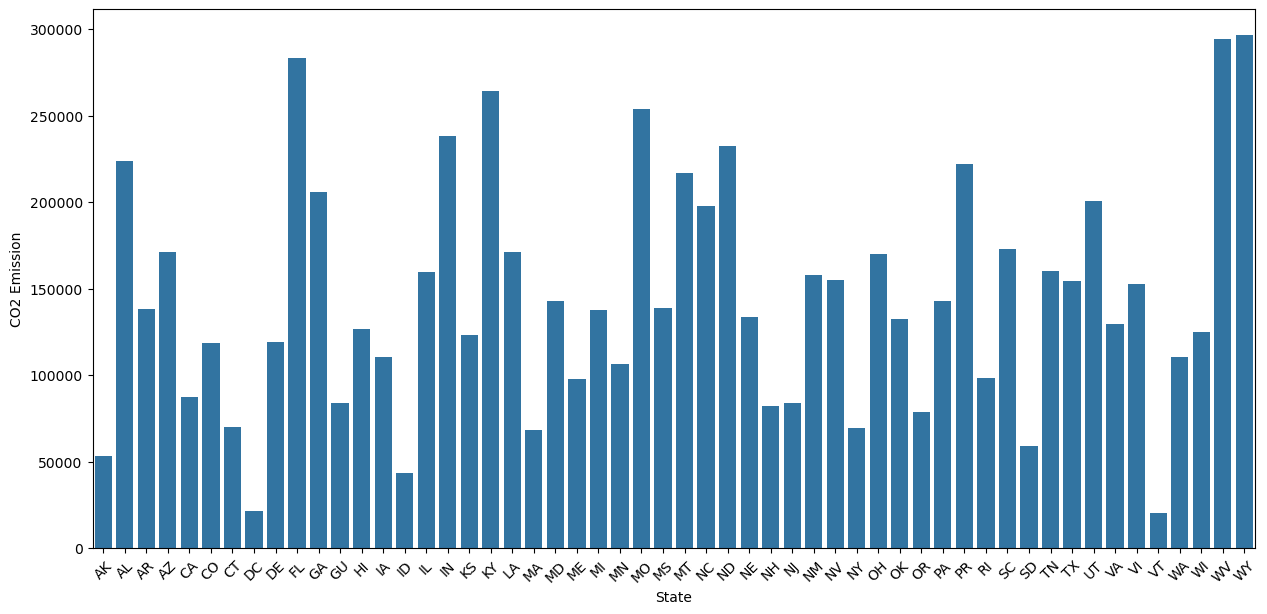

In [23]:
plt.figure(figsize=(15, 7))
sns.barplot(data=avg_co2, x="State", y="CO2 Emission")
plt.xticks(rotation=45, fontsize=10)


In [ ]:
gas_types.isna().sum()

Address Line 1         0
Address Line 2    203601
City                   0
CO2 Emission           0
County              5040
Facility ID            0
Gas Code               0
Gas Name               0
Latitude             226
Longitude            226
State                  0
State Name             0
Year                   0
Zip Code               0
Facility Name          0
FIPS                5059
dtype: int64

The number of umique values in eahc, could be useful to kno what to group by such as state, gas code and name 

In [ ]:
gas_types.nunique()

Address Line 1      8464
Address Line 2         0
City                4567
CO2 Emission      112528
County              2864
Facility ID         9083
Gas Code              12
Gas Name              12
Latitude            9653
Longitude           9657
State                 54
State Name            54
Year                  10
Zip Code            5378
Facility Name       9347
FIPS                2021
dtype: int64

In [ ]:
air_quality = pd.read_csv('us_air_quality_measures.csv')
air_quality.tail()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
218630,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2007,6.207126,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218631,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2008,6.369764,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218632,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2009,6.241708,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218633,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2010,6.125957,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218634,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2011,6.646464,µg/m³,Micograms per cubic meter,Monitor & Modeled,0


The air_quality dataframe contains air quality measures across different states/counties in the United States. It contains over 218,000 entries.

In [ ]:
# Ran out of steam. Next step is to change all addresses to uppercase or lowercase so we can merge

merged_gas_types_and_facilities = gas_types.merge(facilities, on = 'Address Line 1')
merged_gas_types_and_facilities.head(5)

,Address Line 1,Address Line 2_x,City_x,CO2 Emission,County_x,Facility ID,Gas Code,Gas Name,Latitude_x,Longitude_x,...,State Name_y,Year_y,Zip Code_y,Facility Name_y,Secondary NAICS Code,Additional NAICS Codes,Cogeneration Unit Emission Index(?),EPA Verified,Parent Company,Plant Code Indicator
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.0,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,...,WISCONSIN,2011.0,54304.0,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,322291.0,NaN,Y,NaN,KOCH INDUSTRIES INC (100%),NaN
1,1919 S. BROADWAY,NaN,GREEN BAY,58024.0,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,...,WISCONSIN,2010.0,54304.0,GEORGIA-PACIFIC CONSUMER PRODUCTS LP,322291.0,NaN,Y,NaN,KOCH INDUSTRIES INC. (100%),NaN
2,1919 S. BROADWAY,NaN,GREEN BAY,58024.0,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,...,WISCONSIN,2015.0,54304.0,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,322291.0,NaN,Y,NaN,KOCH INDUSTRIES INC (100%),Y
3,1919 S. BROADWAY,NaN,GREEN BAY,58024.0,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,...,WISCONSIN,2018.0,54304.0,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,322291.0,NaN,N,NaN,KOCH INDUSTRIES INC (100%),Y
4,1919 S. BROADWAY,NaN,GREEN BAY,58024.0,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,...,WISCONSIN,2013.0,54304.0,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,322291.0,NaN,Y,Y,KOCH INDUSTRIES INC (100%),Y


In [ ]:
merged_gas_types_and_facilities.value_counts("County_x")

County_x
HARRIS COUNTY      134593
DALLAS COUNTY       36679
Oklahoma            30413
OKLAHOMA COUNTY     29604
DENVER COUNTY       26115
                    ...  
METCALFE COUNTY         3
MEDINA COUNTY           3
LANDER COUNTY           2
LESLIE COUNTY           1
LEWIS AND CLARK         1
Name: count, Length: 2864, dtype: int64

In [ ]:
facilities.head(5)

,Address Line 1,Address Line 2,CEMS Used,City,County,FIPS,Facilities ID,Latitude,Longitude,NAICS Code,...,State Name,Year,Zip Code,Facility Name,Secondary NAICS Code,Additional NAICS Codes,Cogeneration Unit Emission Index(?),EPA Verified,Parent Company,Plant Code Indicator
0,301 COMMERCE DR. SUITE 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 SHELL E&P COURT,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
5,2237 HATCHER HILL RD,NaN,NaN,BACONTON,Mitchell,13205.0,1001409.0,31.386900,-84.081900,221112.0,...,GEORGIA,2011.0,31716.0,Baconton,NaN,NaN,N,NaN,SOWEGA ENERGY RESOURCES LLC. (65%); TEJAS POW...,NaN


In [ ]:
facilities.value_counts("County")

County
HARRIS COUNTY        1877
JEFFERSON COUNTY      858
DALLAS COUNTY         556
WASHINGTON COUNTY     535
MONTGOMERY COUNTY     484
                     ... 
COCKE                   1
GARRARD COUNTY          1
LAUDERDALE              1
LESLIE COUNTY           1
GEAUGA COUNTY           1
Name: count, Length: 2866, dtype: int64

In [ ]:
harris=facilities[facilities["County"]== "HARRIS COUNTY"]

In [ ]:
harris.nunique()

Address Line 1                         204
Address Line 2                           0
CEMS Used                                0
City                                    28
County                                   1
FIPS                                     2
Facilities ID                          328
Latitude                               160
Longitude                              162
NAICS Code                              44
State                                    5
State Name                               5
Year                                    10
Zip Code                                61
Facility Name                          338
Secondary NAICS Code                    12
Additional NAICS Codes                   9
Cogeneration Unit Emission Index(?)      2
EPA Verified                             1
Parent Company                         318
Plant Code Indicator                     2
dtype: int64

we have 328 unique facilty ids but only 204 unique facility addresses 

In [ ]:
harris.groupby("Address Line 1").describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7efeff0377d0>>

In [ ]:
val=harris.groupby("Address Line 1").count
val

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7efeff04c250>>

In [ ]:
harris.pivot_table(index='Address Line 1', columns='Facilities ID', aggfunc='size', fill_value=0).head(5)

Facilities ID,1000053.0,1000619.0,1000620.0,1001630.0,1001710.0,1001711.0,1001712.0,1001713.0,1001905.0,1002003.0,...,1013399.0,1013411.0,1013415.0,1013625.0,1013675.0,1013679.0,1013709.0,1013710.0,1013722.0,1013731.0
Address Line 1,,,,,,,,,,,,,,,,,,,,,
1000 LOUISIANA STREET SUITE 6600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 LOUISIANA STREET SUITE 6700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 LOUISIANA STREET SUITE 6900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1000 MAIN SUITE 3000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 MAIN ST SUITE 3000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count = harris.groupby('Facilities ID')['Address Line 1'].count().to_frame()
multiples= count[count >1].index
# multiples.
count

,Address Line 1
Facilities ID,
1000053.0,7
1000619.0,10
1000620.0,10
1001630.0,4
1001710.0,9
...,...
1013679.0,1
1013709.0,1
1013710.0,1


In [ ]:
multiplies_val = harris[harris['Facilities ID'].isin(multiples)]
multiplies_val.head()

,Address Line 1,Address Line 2,CEMS Used,City,County,FIPS,Facilities ID,Latitude,Longitude,NAICS Code,...,State Name,Year,Zip Code,Facility Name,Secondary NAICS Code,Additional NAICS Codes,Cogeneration Unit Emission Index(?),EPA Verified,Parent Company,Plant Code Indicator
26,500 DALLAS STREET SUITE 1650,NaN,NaN,Houston,HARRIS COUNTY,48201.0,1010673.0,29.758060,-95.364010,211130.0,...,TEXAS,2019.0,77002.0,Paradox Upstream LLC 585 Paradox Basin,NaN,NaN,N,NaN,PARADOX RESOURCES LLC (100%),N
67,5847 SAN FELIPE SUITE 3000,NaN,NaN,Houston,HARRIS COUNTY,48201.0,1008199.0,29.749708,-95.481970,211111.0,...,TEXAS,2017.0,77057.0,Grizzly Arkoma Basin,NaN,NaN,NaN,NaN,VANGUARD NATURAL RESOURCES INC (100%),N
201,2000 POST OAK SUITE 100,NaN,NaN,Houston,HARRIS COUNTY,48201.0,1008224.0,29.745920,-95.559620,211111.0,...,TEXAS,2012.0,77056.0,Apache Corp. GC Onshore - Gulf Coast Basin 220,NaN,NaN,N,NaN,APACHE CORP (100%),NaN
254,1001 NOBLE ENERGY WAY,NaN,NaN,Houston,HARRIS COUNTY,48201.0,1010350.0,29.960188,-95.558799,211111.0,...,TEXAS,2013.0,77070.0,Basin 160A - Appalachia,NaN,NaN,N,Y,NOBLE ENERGY INCORPORATED (100%),N
286,1111 BAGBY STREET SUITE 4600,NaN,NaN,Houston,HARRIS COUNTY,48201.0,1011873.0,29.758670,-95.370540,211111.0,...,TEXAS,2015.0,77002.0,Lime Rock Resources III-A Williston Basin,NaN,NaN,N,NaN,LIME ROCK RESOURCES III-A LP (100%),N


In [ ]:
# Step 1: Group by 'Facilities ID' and get counts.
count = harris.groupby('Facilities ID')['Address Line 1'].count()

# Step 2: Sort these counts in descending order.
sorted_count = count.sort_values(ascending=False).to_frame()

# Step 3: For each 'Facilities ID', get the actual addresses.
def list_addresses(group):
    return ', '.join(group['Address Line 1'].unique())

addresses = harris.groupby('Facilities ID').apply(list_addresses).to_frame(name='Unique Addresses')

# Merge counts and addresses into a single DataFrame.
result = sorted_count.join(addresses)
result


,Address Line 1,Unique Addresses
Facilities ID,,
1006297.0,10,1111 LOUISIANA
1003402.0,10,2500 N. SOUTH ST.
1003007.0,10,1423 PASADENA FREEWAY
1005095.0,10,6161 UNDERWOOD RD
1004972.0,10,10825 TELGE RD.
...,...,...
1010473.0,1,1501 MCKINNEY STREET
1002776.0,1,NINE GREENWAY PLAZA SUITE 300
1011418.0,1,600 TRAVIS ST. SUITE 1400


Moving on, i needed help doing that


In [ ]:
facilities['Latitude'].value_counts()

Latitude
29.758940    159
29.756080    120
29.752554    111
29.758160    102
35.533760     93
            ... 
42.283109      1
44.481161      1
42.309227      1
37.917778      1
36.040016      1
Name: count, Length: 9658, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
facilities.head()

,Address Line 1,Address Line 2,CEMS Used,City,County,FIPS,Facilities ID,Latitude,Longitude,NAICS Code,...,State Name,Year,Zip Code,Facility Name,Secondary NAICS Code,Additional NAICS Codes,Cogeneration Unit Emission Index(?),EPA Verified,Parent Company,Plant Code Indicator
0,301 COMMERCE DR. SUITE 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 SHELL E&P COURT,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
5,2237 HATCHER HILL RD,NaN,NaN,BACONTON,Mitchell,13205.0,1001409.0,31.386900,-84.081900,221112.0,...,GEORGIA,2011.0,31716.0,Baconton,NaN,NaN,N,NaN,SOWEGA ENERGY RESOURCES LLC. (65%); TEJAS POW...,NaN


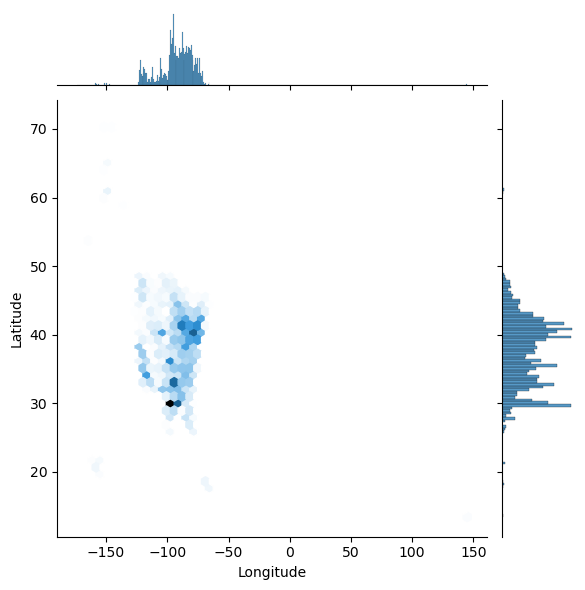

In [ ]:
graph=facilities[['Latitude','Longitude']].dropna()
sns.jointplot(data=graph, x='Longitude', y='Latitude', kind="hex")

In [ ]:
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


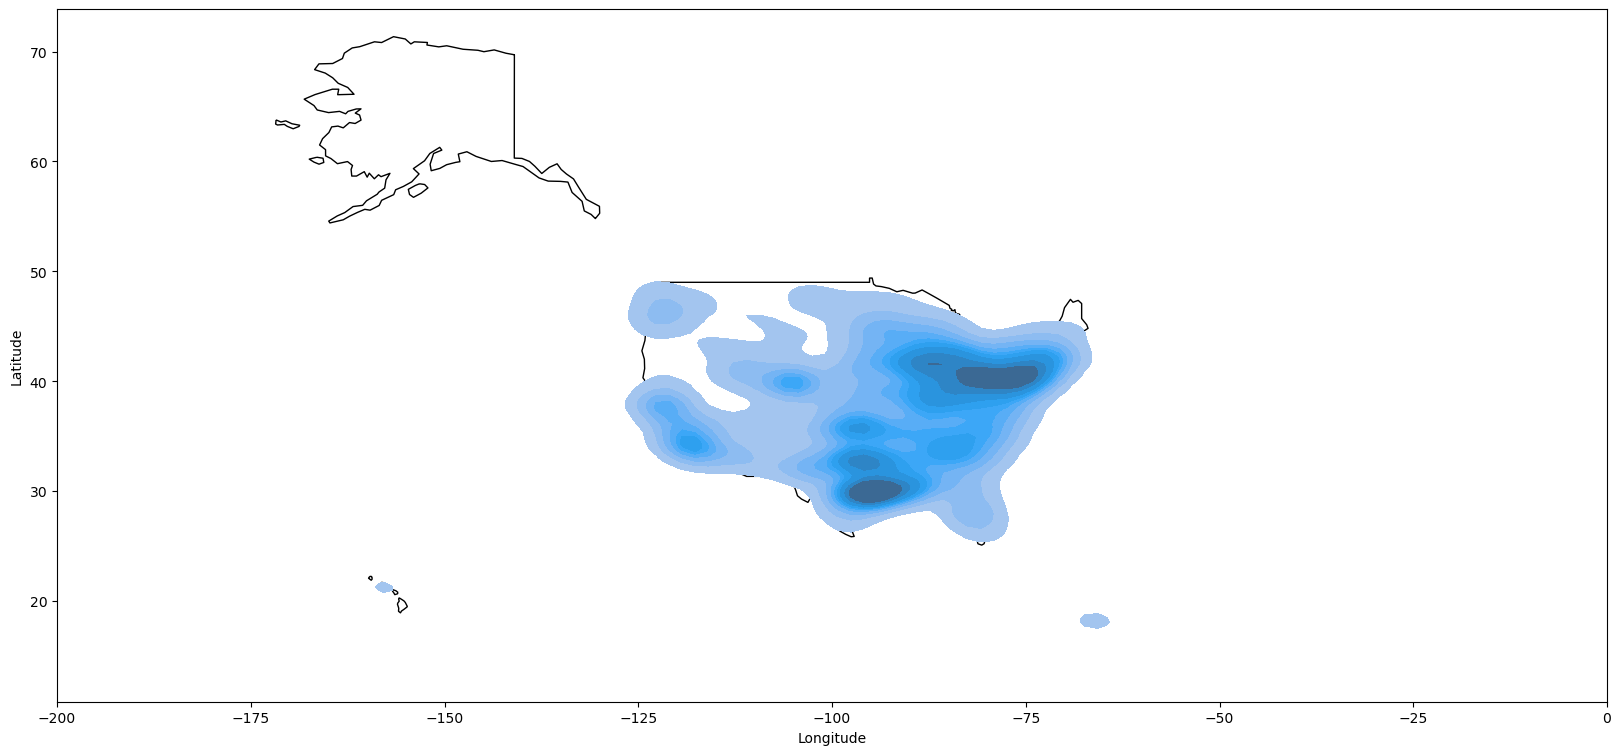

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filter for the United States
us = world[world['ADMIN'] == "United States of America"]

# Create a base matplotlib axis
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim([-200, 0])
ax.set_aspect('equal')

# Plot the United States on that axis
us.plot(ax=ax, color="white", edgecolor="black")

# Overlay the KDE plot on the same axis
sns.kdeplot(data=graph, x='Longitude', y='Latitude', fill=True, ax=ax)

plt.show()

In [ ]:
sns.kdeplot(data=graph, x='Longitude', y='Latitude', fill=True, ax=ax)

<Axes: xlabel='Longitude', ylabel='Latitude'>

In [ ]:
facilities.value_counts("State").head(5)

State
TX    9733
CA    4725
PA    3330
LA    2891
OH    2634
IL    2632
MI    2324
OK    2233
NY    2229
IN    2076
CO    2022
FL    1899
AL    1720
GA    1678
IA    1580
VA    1531
KY    1496
WI    1410
MN    1386
NC    1386
AR    1292
TN    1277
MO    1191
KS    1179
MS    1096
WV    1058
SC    1015
NJ    1002
WA     954
MA     849
AZ     814
NM     782
NE     770
MD     697
UT     675
WY     640
ND     617
OR     595
CT     479
ID     422
AK     405
NV     405
MT     381
SD     347
ME     284
HI     277
PR     233
DE     228
NH     197
RI     121
VT      99
DC      60
GU      51
VI      39
Name: count, dtype: int64